In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

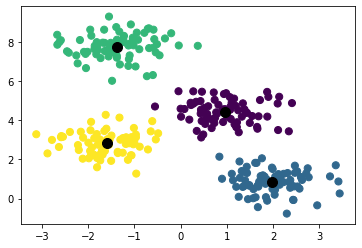

In [3]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X)
# predict method is going to predict the label for each point 
y_kmean = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_kmean);
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c="black",s=100)


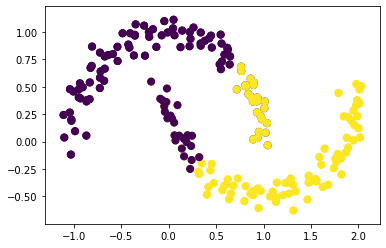

In [4]:
# kmean is good algorithm when the decision boundry is fairly linear. when decision boundry is non linear kmean do not perform 
# good.
from sklearn.datasets import make_moons
X,y = make_moons(200,noise=0.07,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y,s=50)

k_model=KMeans(n_clusters=2)
k_model.fit(X)
y_predict = k_model.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_predict,s=50)
# the trick to do better boundry detection is to use kernel transformation to project the data in higher dimension where
# linear separation is possible 


In [5]:
from sklearn.datasets import load_digits
digit = load_digits()
digit.data.shape

(1797, 64)

In [6]:
model = KMeans(n_clusters=10)
clusters = model.fit_predict(digit.data)
print(clusters.shape)
print(digit.target.shape)

(1797,)
(1797,)


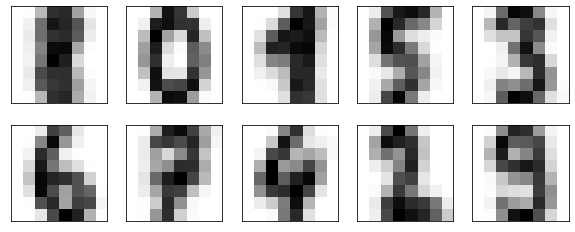

In [42]:
fig,ax= plt.subplots(2,5,figsize=(10,4),subplot_kw={'xticks':[], 'yticks':[]})
centers = model.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.imshow(center,cmap=plt.cm.binary,interpolation='nearest')


In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(digit.target,clusters)

0.14635503617139678

[[  1   0   0   0   0   0 177   0   0   0]
 [  0   0  24  99   2   1   0   0   1  55]
 [  0   3 148   8   0   0   1   2  13   2]
 [  0   7   0   7   0   2   0  13 154   0]
 [166   8   0   4   0   0   0   0   0   3]
 [  2   0   0   0   1 136   0  42   1   0]
 [  0   0   0   2 177   0   1   0   0   1]
 [  0 177   0   2   0   0   0   0   0   0]
 [  0   5   3 101   2   4   0  52   2   5]
 [  0   8   0   2   0   4   0 140   6  20]]


Text(33.0, 0.5, 'predicted')

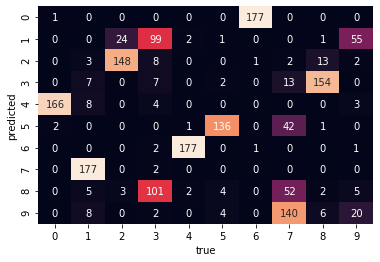

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digit.target,clusters)
print(mat)
sns.heatmap(mat,annot=True,xticklabels=digit.target_names,yticklabels = digit.target_names,fmt="d",cbar=False)
plt.xlabel("true")
plt.ylabel("predicted")